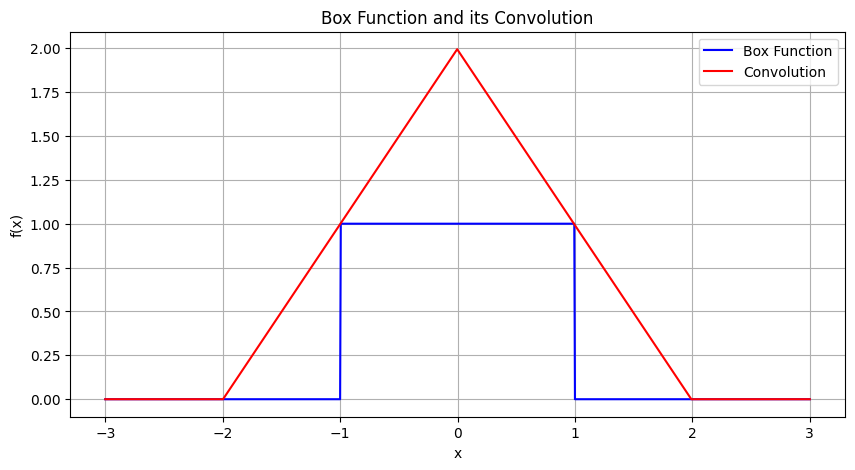

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the box function
def box_function(x):
    return np.where(np.logical_and(-1 < x, x < 1), 1, 0)

# Define the convolution function
def convolution(f, g, dx, n):

    # Pad the functions with zeros to avoid boundary issues
    f_padded = np.pad(f, (0, len(g)), mode='constant')
    g_padded = np.pad(g, (0, len(f)), mode='constant')
    # Compute convolution using FFT
    f_dft = np.fft.fft(f_padded, norm = 'ortho')
    g_dft = np.fft.fft(g_padded, norm = 'ortho')
    multiplied_dft = f_dft * g_dft
    convolution_result = np.fft.ifft(multiplied_dft, norm = 'ortho').real
    # Scale by dx
    return convolution_result * dx * np.sqrt(2*n)

# Define the x range and step
xmin = -3
xmax = 3
n = 1024
x = np.linspace(xmin, xmax, n)
dx = x[1] - x[0]

# Compute the box function
box = box_function(x)

# Compute the convolution of the box function with itself
convolution_result = convolution(box, box, dx, n)

convo_result = convolution_result[int(n/2):int(-n/2)]

# Plot the box function
plt.figure(figsize=(10, 5))
plt.plot(x, box, label='Box Function', color = 'b')
# Plot the convolution result
plt.plot(x, convo_result[:len(x)], label='Convolution', color = 'r')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Box Function and its Convolution')
plt.legend()
plt.grid(True)
plt.show()
